In [12]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## K-Nearset Neighbour model 

In [29]:
def euclidian_distance(X1,X2):
    distance = np.sqrt(np.sum(X1-X2)**2)
    return distance

class KNN:
    def __init__(self,k=3):
        self.k = k
        
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        
    def predict(self,X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    
    
    def _predict(self,x):
        
        #compute the distance
        distances  = [euclidian_distance(x,x_train) for x_train in self.X_train]
        
        #get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        #Majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
        

## Checking the model with a sample dataset "iris_dataset" from sklearn

In [14]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Splitting the dataset for the training

In [45]:
X,y  = iris.data, iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [21]:

print("X_train =", len(X_train), "X_test =", len(X_test), "y_train =", len(y_train), "y_test =", len(y_test))


X_train = 120 X_test = 30 y_train = 120 y_test = 30


## Classifying the data set for the training

In [52]:
clf = KNN(k=9)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0]


## plotting scattered points

<function matplotlib.pyplot.show(close=None, block=None)>

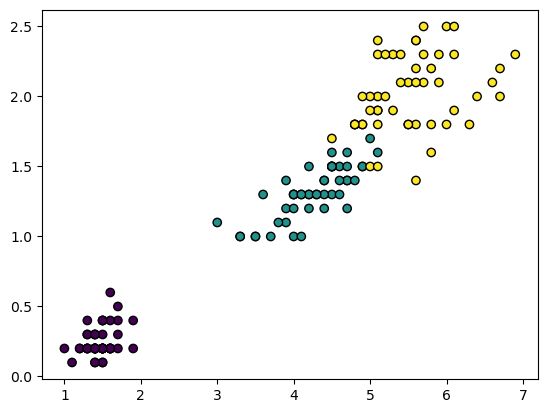

In [53]:
plt.figure()
plt.scatter(X[:,2],X[:,3],c= y,edgecolors="k")
plt.show

## Accuracy rate of the model

In [54]:
accuracy = np.sum(predictions == y_test)/ len(y_test)
print(accuracy)

0.9666666666666667
